In [ ]:
import numpy as np
import pandas as pd
import zipfile
import gc
gc.enable()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Data_btp2/"
train=zipfile.ZipFile(path+"data_train"+".zip","r")
test=zipfile.ZipFile(path+"data_test"+".zip","r")

In [ ]:
data_train = pd.read_csv(train.open('data_train.csv'))
data_test = pd.read_csv(test.open('data_test.csv'))



In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833292 entries, 0 to 4833291
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   user_id                      int64  
 1   product_id                   int64  
 2   uxp_times_bought             int64  
 3   uxp_reorder_ratio            float64
 4   uxp_last_five                float64
 5   uxp_ratio_last_five          float64
 6   u_num_of_orders              int64  
 7   u_avg_prd                    float64
 8   dow_u_most_orders            int64  
 9   hod_u_most_orders            int64  
 10  u_reorder_ratio              float64
 11  average_days_between_orders  float64
 12  u_total_items_bought         int64  
 13  p_num_of_times               int64  
 14  p_reorder_ratio              float64
 15  p_avg_cart_position          float64
 16  aisle_id                     float64
 17  department_id                float64
dtypes: float64(10), int64(8)
memory usage: 663

In [ ]:
data_test.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,u_avg_prd,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,average_days_between_orders,u_total_items_bought,p_num_of_times,p_reorder_ratio,p_avg_cart_position,aisle_id,department_id
0,3,248,1,0.090909,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,6371,0.400251,10.620782,0.070016,0.088504
1,3,1005,1,0.333333,1.0,0.2,12,7.333333,0,16,0.625,13.590909,88,463,0.440605,9.498920,0.066098,0.126562
2,3,1819,3,0.333333,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,2424,0.492162,9.287541,0.063782,0.037791
3,3,7503,1,0.100000,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,12474,0.553551,9.547379,0.070016,0.088504
4,3,8021,1,0.090909,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,27864,0.591157,8.822854,0.095193,0.054678


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474661 entries, 0 to 8474660
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   user_id                      int64  
 1   product_id                   int64  
 2   uxp_times_bought             int64  
 3   uxp_reorder_ratio            float64
 4   uxp_last_five                float64
 5   uxp_ratio_last_five          float64
 6   u_num_of_orders              int64  
 7   u_avg_prd                    float64
 8   dow_u_most_orders            int64  
 9   hod_u_most_orders            int64  
 10  u_reorder_ratio              float64
 11  average_days_between_orders  float64
 12  u_total_items_bought         int64  
 13  p_num_of_times               int64  
 14  p_reorder_ratio              float64
 15  p_avg_cart_position          float64
 16  reordered                    float64
 17  aisle_id                     float64
 18  department_id                float64
dtype

In [ ]:
pip install scikit-plot

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import f1_score, classification_report
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.classifiers import plot_feature_importances

In [ ]:
import xgboost as xgb

In [ ]:
X = data_train.drop(['reordered', 'uxp_ratio_last_five'], axis=1)
y = data_train.reordered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
parameters = {
    'eavl_metric' : 'logloss',
    'max_depth' : 5,
    'colsample_bytree' : 0.4,
    'subsample' : 0.8
}

In [ ]:
xgb = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

#fitting the model.
xgb.fit(X_train, y_train)

[07:38:38] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_boost_round=10, objective='binary:logistic',
              parameters={'colsample_bytree': 0.4, 'eavl_metric': 'logloss',
                          'max_depth': 5, 'subsample': 0.8},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = (xgb.predict_proba(X_test)[:, 1] >= 0.21).astype('int')

F1 Score: 0.4305825242718446
              precision    recall  f1-score   support

           0       0.91      0.94      0.93   2222006
           1       0.49      0.38      0.43    320393

    accuracy                           0.87   2542399
   macro avg       0.70      0.66      0.68   2542399
weighted avg       0.86      0.87      0.87   2542399



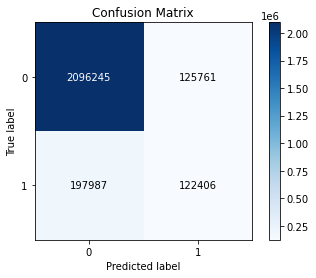

In [ ]:
print('F1 Score: {}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_pred, y_test))
plot_confusion_matrix(y_pred, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_feature_importances is deprecated; This will be removed in v0.4.0. Please use scikitplot.estimators.plot_feature_importances instead.
  warnings.warn(msg, category=FutureWarning)


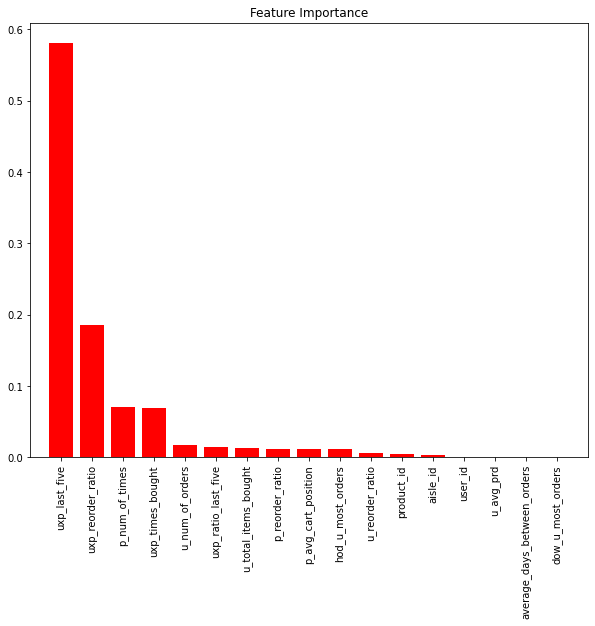

In [ ]:
plot_feature_importances(xgb, feature_names=data_test.columns, x_tick_rotation=90, max_num_features=20, figsize=(10,8))

In [ ]:
import pickle
filename = 'XGB_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
# Entire Data
# xgb.fit(data_train.drop(['reordered', 'uxp_ratio_last_five'], axis=1), data_train.reordered)

[07:34:27] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [ ]:
y_pred_test = (xgb.predict_proba(data_test.drop('uxp_ratio_last_five', axis=1))[:, 1] >= 0.21).astype('int')

In [ ]:
data_test['prediction'] = y_pred_test
data_test.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,u_avg_prd,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,average_days_between_orders,u_total_items_bought,p_num_of_times,p_reorder_ratio,p_avg_cart_position,aisle_id,department_id,prediction
0,3,248,1,0.090909,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,6371,0.400251,10.620782,0.070016,0.088504,0
1,3,1005,1,0.333333,1.0,0.2,12,7.333333,0,16,0.625,13.590909,88,463,0.440605,9.498920,0.066098,0.126562,0
2,3,1819,3,0.333333,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,2424,0.492162,9.287541,0.063782,0.037791,0
3,3,7503,1,0.100000,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,12474,0.553551,9.547379,0.070016,0.088504,0
4,3,8021,1,0.090909,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,27864,0.591157,8.822854,0.095193,0.054678,0


In [ ]:
final = data_test.reset_index()
final = final[['product_id', 'user_id', 'prediction']]

gc.collect()
final.head()

,product_id,user_id,prediction
0,248,3,0
1,1005,3,0
2,1819,3,0
3,7503,3,0
4,8021,3,0


In [ ]:
orders=zipfile.ZipFile(path+"orders"+".zip","r")
orders = pd.read_csv(orders.open('orders.csv'))

In [ ]:
orders_test = orders.loc[orders.eval_set == 'test', ['user_id', 'order_id']]
orders_test.head()

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845


In [ ]:
final = final.merge(orders_test, on='user_id', how='left')
final.head()

,product_id,user_id,prediction,order_id
0,248,3,0,2774568
1,1005,3,0,2774568
2,1819,3,0,2774568
3,7503,3,0,2774568
4,8021,3,0,2774568


In [ ]:
final = final.drop('user_id', axis=1)

In [ ]:
final['product_id'] = final.product_id.astype(int)

del orders
del orders_test
gc.collect()

final.head()

,product_id,prediction,order_id
0,248,0,2774568
1,1005,0,2774568
2,1819,0,2774568
3,7503,0,2774568
4,8021,0,2774568


In [ ]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'
        
gc.collect()

148

In [ ]:
sub = pd.DataFrame.from_dict(d, orient='index')

#Reset index
sub.reset_index(inplace=True)
#Set column names
sub.columns = ['order_id', 'products']

sub.head()

,order_id,products
0,2774568,17668 18599 21903 22035 39190 43961 47766
1,1528013,21903 38293
2,1376945,8309 13176 14947 27959 28465 33572 34658 35948...
3,1356845,7076 10863 11520 13176 14992
4,2161313,196 10441 11266 12427 14715 27839 37710


In [ ]:
sub.to_csv('sub.csv', index=False, header=True)